In [0]:
from sklearn import datasets
import numpy as np

In [0]:
iris = datasets.load_iris()

In [0]:
# check the shape of the data
print('Shape is: ', iris.data.shape)
print(iris.data[0:3])

Shape is:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [0]:
X = iris.data[:,[2,3]]
y = iris.target

In [0]:
print('Class labels:', np.unique(y))
print('Label counts in y:', np.bincount(y))

Class labels: [0 1 2]
Label counts in y: [50 50 50]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test :', np.bincount(y_test))

Labels counts in y_train: [35 35 35]
Labels counts in y_test : [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [0]:
from sklearn.linear_model import Perceptron

In [0]:
ppn = Perceptron(max_iter = 40, eta0=0.1, random_state = 1)

In [0]:
ppn.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 9


In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.80


In [0]:
print('Accuracy score: %0.2f' % ppn.score(X_test_std, y_test))

Accuracy score: 0.80


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [0]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  
  markers = ('s','x','o','^','v')
  colors  = ('red','blue','green','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0], y=X[y==cl,1], 
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl, edgecolor = 'black')
  if test_idx: 
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:,0], X_test[:,1],
               c='', edgecolor='black', alpha=1.0,
               linewidth=1, marker='o', s=100, label='test set')
    
    

In [0]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

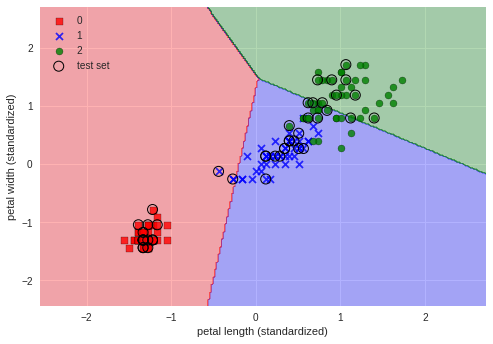

In [0]:
plot_decision_regions(X=X_combined_std, y=y_combined_std,
                     classifier = ppn, 
                     test_idx = range(105,150))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

In [0]:
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)


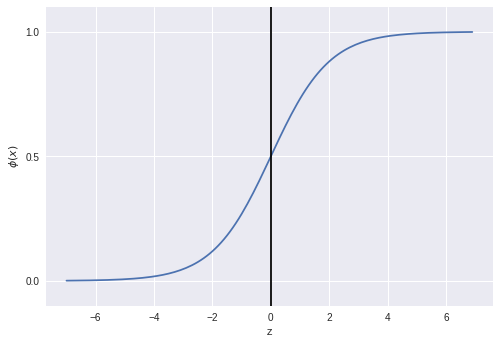

In [0]:
plt.plot(z, phi_z)
plt.axvline(0,0,color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (x)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)


In [0]:
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1.0 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]

c0 = [cost_0(x) for x in z]

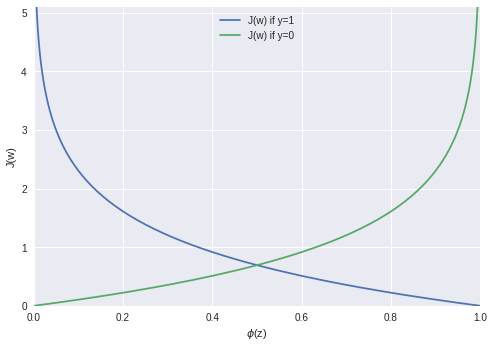

In [0]:
plt.plot(phi_z, c1, label='J(w) if y=1')
plt.plot(phi_z, c0, label='J(w) if y=0')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()
